In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

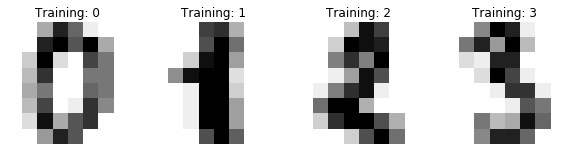

In [2]:
#loading dataset
digits = datasets.load_digits()

#showing first 4 image with their labels

_, axes = plt.subplots(nrows=1, ncols=4, figsize = (10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation = "nearest")
    ax.set_title("Training: %i" % label)

In [3]:
#flatten the image
n_samples = len(digits.images)
data = digits.images.reshape(n_samples, -1)

#Create classifier
clf = svm.SVC(gamma=0.001)

#split data into trains and test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.8, shuffle=False)

#fitting
clf.fit(X_train, y_train)

#Creating the predictions

predicted = clf.predict(X_test)

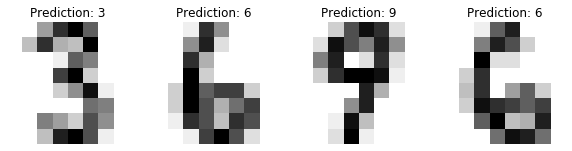

In [4]:
#showing the images with their predicted labels

_, axes = plt.subplots(nrows=1, ncols=4, figsize = (10,3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation = "nearest")
    ax.set_title(f"Prediction: {prediction}")

In [21]:
#Creating the report to check the metrics
print (f"Classification Report {clf} \n" f" {metrics.classification_report(y_test, predicted)} \n")

Classification Report SVC(gamma=0.001) 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       140
           1       0.90      0.73      0.80       144
           2       0.86      0.93      0.89       141
           3       0.98      0.76      0.86       145
           4       0.98      0.97      0.97       147
           5       0.96      0.92      0.94       146
           6       0.97      0.96      0.96       145
           7       0.96      0.91      0.94       144
           8       0.84      0.87      0.86       140
           9       0.65      0.91      0.76       146

    accuracy                           0.89      1438
   macro avg       0.91      0.89      0.90      1438
weighted avg       0.91      0.89      0.90      1438
 



AttributeError: 'Figure' object has no attribute 'subplot'

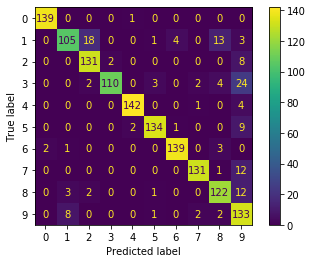

In [20]:
#evaluating the model 

disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.subplot("Confusion Matrix")
print (f"Confusion Matrix: \m{disp.confusion_matrix}")

plt.show

# Performing Cross Validation and Grid Search to identify best parameters

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Getting the cross validation scores

scores = cross_val_score(clf, X_train, y_train, cv=5)
print (scores)
print (scores.mean())

#Using Grid Search to find the best parameters

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    kernels = ['linear', 'rbf']
    param_grid = {'C': Cs, 'gamma' : gammas, "kernel" : kernels}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X,y)
    grid_search.best_params_
    return grid_search.best_params_

svc_param_selection(X_train, y_train, 5)

[0.97222222 0.98611111 1.         1.         0.94366197]
0.9803990610328638


{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}

# Changing the parameters to match the ones indicated by the Grid Search 

In [26]:
#flatten the image
n_samples = len(digits.images)
data = digits.images.reshape(n_samples, -1)

#Create classifies with the best parameters
clf = svm.SVC(gamma=0.001, C = 0.01, kernel = "linear")


#split data into trains and test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.8, shuffle=False)


clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

In [27]:
#Cheking the metrics again to see the difference
print (f"Classification Report {clf} \n" f" {metrics.classification_report(y_test, predicted)} \n")

Classification Report SVC(C=0.01, gamma=0.001, kernel='linear') 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       140
           1       0.88      0.79      0.84       144
           2       0.90      0.94      0.92       141
           3       0.97      0.83      0.90       145
           4       0.98      0.93      0.95       147
           5       0.88      0.92      0.90       146
           6       0.95      0.97      0.96       145
           7       0.95      0.88      0.91       144
           8       0.90      0.88      0.89       140
           9       0.70      0.87      0.78       146

    accuracy                           0.90      1438
   macro avg       0.91      0.90      0.90      1438
weighted avg       0.91      0.90      0.90      1438
 



AttributeError: 'Figure' object has no attribute 'subplot'

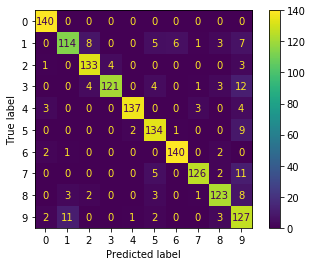

In [30]:
#evaluating the model after changing the parameters to match the ones indicated by the Grid Search

disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.subplot("Confusion Matrix")
print (f"Confusion Matrix: \m{disp.confusion_matrix}")

plt.show

In [ ]:
#Saving the model
import pickle 
trained_model = pickle.dumps(clf)

In [ ]:
#loading the model
loaded_model = pickle.loads(trained_model)
loaded_model.predict(data[0:1])